# Qiskit Global Summer School 2023 - Lab 1

This lab shows you how to use Qiskit to implement some of the key concepts you learned in the first 3 lectures of the Qiskit Global Summer School 2023.

In [1]:
# required imports:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, CXGate
import numpy as np

## Vectors and Dirac Notation

In the lectures you learned different ways of representing quantum states, including how to use bra-ket (Dirac) notation.

Although bra-ket notation cannot be represented exactly in code, we can represent their vector and matrix equivalent with python.

E.g. we can represent $|0\rangle$ using a python list:

In [2]:
ket0 = [[1],[0]]

And we can use one of Qiskit's visualisation tools to make our vectors nicer to look at:

In [3]:
array_to_latex(ket0)

<IPython.core.display.Latex object>

We can do the same with $\langle0|$:

In [4]:
bra0 = [1,0]
array_to_latex(bra0)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex 1 - create $|1\rangle$ and $\langle1|$ with python lists </div>

In [5]:
ket1 = [[0],[1]]
bra1 = [0,1]

In [6]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex1 

grade_lab1_ex1([ket1, bra1])

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Qiskit `Statevector` Class

In the lectures you learned about using state vectors to represent quantum states. You can represent quantum state vectors in code using Qiskit's [`Statevector` class](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html).

Qiskit's `Statevector` class can take different forms of input (e.g. python list, numpy array, another state vector) to construct a state vector.

Let's take the `bra0` object we created earlier and convert it to a `Statevector` object:

In [7]:
sv_bra0 = Statevector(bra0)

sv_bra0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


The `Statevector` class has its own `draw()` method:

In [8]:
sv_bra0.draw('latex')

<IPython.core.display.Latex object>

We can create more complex statevectors with multiple qubits like this:

In [9]:
sv_eq = Statevector([1/2, 3/4, 4/5, 6/8])

sv_eq.draw('latex')

<IPython.core.display.Latex object>

Note that the vector above is not a valid state vector as it is not normalised. 
We can check this with the `is_valid()` method:

In [10]:
sv_eq.is_valid()

False

<div class="alert alert-block alert-success"> Ex 2 - create your own valid statevector object using the `Statevector` class </div>

In [11]:
sv_valid = Statevector([1 / np.sqrt(3), 0, 0, np.sqrt(2) / np.sqrt(3)])

In [12]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex2 

grade_lab1_ex2(sv_valid)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Qiskit `Operator` Class

The [`Operator` class](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html#qiskit.quantum_info.Operator) is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

One way we can initialise a Qiskit `Operator` is by using a python list, like the one we created earlier:

In [13]:
op_bra0 = Operator(bra0)

op_bra0

Operator([1.+0.j, 0.+0.j],
         input_dims=(), output_dims=(2,))

The Operator class comes with some handy methods for working with operators, for example we can find the tensor product of 2 operators by using the `tensor()` method:

In [14]:
op_ket0 = Operator(ket0)
op_bra0.tensor(op_ket0)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(), output_dims=(2, 2))

We'll use the `Operator` and `Statevector` classes more in the following exercises.

## Inner & Outer Product

In the lectures you covered the concepts of the inner and outer product. We can explore these concepts in code using numpy methods `.dot()` (the inner product is a generalised form of the dot product) and `.outer()`.

For example, we can find the inner product $\langle0|0\rangle$ like this:

In [15]:
braket = np.dot(op_bra0,op_ket0)
array_to_latex(braket)

<IPython.core.display.Latex object>

and the outer product $|0\rangle\langle0|$ like this:

In [16]:
ketbra = np.outer(ket0,bra0)
array_to_latex(ketbra)

<IPython.core.display.Latex object>

In [17]:
braket = np.dot(op_bra0,op_ket0)
array_to_latex(braket)

<IPython.core.display.Latex object>

Note: the numpy methods we used above work with Qiskit Operators as well as regular python lists.

<div class="alert alert-block alert-success"> Ex 3 - use numpy to find the result of the following inner and outer products: $\langle1|0\rangle, \langle0|1\rangle, \langle1|1\rangle, |1\rangle\langle0|, |0\rangle\langle1|$ and $|1\rangle\langle1| $ </div>

In [18]:
bra1ket0 = np.dot(np.array([[1,0]]), np.array([0, 1])) # put your answer for ⟨1|0⟩ here

bra0ket1 = np.dot(np.array([[1,0]]), np.array([0, 1])) # put your answer for ⟨0|1⟩ here

bra1ket1 = np.dot(np.array([[0, 1]]), np.array([0, 1])) # put your answer for ⟨1|1⟩ here

ket1bra0 = np.outer(np.array([[0], [1]]), np.array([[1, 0]])) # put your answer for |1⟩⟨0| here

ket0bra1 = np.outer(np.array([[1], [0]]), np.array([[0, 1]])) # put your answer for |0⟩⟨1| here

ket1bra1 = np.outer(np.array([[0], [1]]), np.array([[0, 1]])) # put your answer for |1⟩⟨1| here

In [19]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex3 

grade_lab1_ex3([bra1ket0, bra0ket1, bra1ket1, ket1bra0, ket0bra1, ket1bra1])

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


<div class="alert alert-block alert-success"> 
    <p> Ex 4 - when the inner product of 2 quantum states is equal to 0, those states are orthogonal. Which of the following states are orthogonal? </p>
    <p>a) $\vert 0\rangle$ and $\vert 1\rangle$ </p>
    <p>b) $\vert 0\rangle$ and $\vert 0\rangle$ </p>
    <p>c) $\vert 1\rangle$ and $\vert 1\rangle$ </p>
</div>

In [20]:
# add or remove your answer from this list
answer = ['a']

In [21]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex4 

grade_lab1_ex4(answer)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Deterministic operations

As mentioned in the lectures, there are 4 single bit deterministic operations:  
f1 = constant-0  
f2 = identity  
f3 = bit flip / not  
f4 = constant-1

$$
\begin{array}{c|c}
  a & f_1(a)\\
  \hline
  0 & 0\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_2(a)\\
  \hline
  0 & 0\\
  1 & 1
\end{array}
\qquad
\begin{array}{c|c}
  a & f_3(a)\\
  \hline
  0 & 1\\
  1 & 0
\end{array}
\qquad
\begin{array}{c|c}
  a & f_4(a)\\
  \hline
  0 & 1\\
  1 & 1
\end{array}
$$

We can create Qiskit Operators for these 4 operations, by passing their matrix representations as arguments to the `Operator` class.

E.g. for constant-0 we can create the corresponding matrix m1 like so:

In [22]:
m1 = Operator([[1,1],[0,0]])
array_to_latex(m1)

<IPython.core.display.Latex object>

and similarly for m3:

In [23]:
m3 = Operator([[0,1],[1,0]])
array_to_latex(m3)

<IPython.core.display.Latex object>

We can also use builtin python mutliplication operations (e.g. `@`, `.dot`, or `.matmul`) to check the following equation: $ M|a\rangle = f|a\rangle $

e.g. $ M1|0\rangle = f1|0\rangle $ = 0

In [24]:
array_to_latex(m1@ket0)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex 5 - create Qiskit Operators for m2 and m4 (hint: check out the lectures to find the appropriate matrices) </div>

In [25]:
m2 = Operator([[1,0],[0,1]]) # create an operator for m2 here
m4 = Operator([[0,0],[1,1]])# create and operator for m4 here

In [26]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex5

grade_lab1_ex5([m2, m4])

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Probabilistic operations

A Controlled-NOT (or CNOT) operation is a probabilistic operation you can apply on 2 qubits.

Applying a CNOT on a state (X,Y) involves performing a NOT operation on Y when X is 1, otherwise do nothing.
X is the control bit, Y is the target bit.

We can implement a CNOT gate (and many other quantum gates) using a class from [Qiskit's circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html):

In [27]:
cnot = CXGate()

array_to_latex(cnot)

<IPython.core.display.Latex object>

Note: this matrix is different from the one that appeared in the lesson because `CXGate()` takes the right qubit to be the control rather than the left qubit.

## Unitary Operations

An operator is unitary if: $ UU^{\dagger} = \mathbb{1} = U^{\dagger} U$

We can check if an operator is Unitary using Qiskit with the `is_unitary()` method:

In [28]:
m3.is_unitary()

True

With small operators like m3 we could probably figure this out easily by ourselves, but with more complex operators it becomes more convenient to use the Qiskit function:

In [29]:
random = Operator(np.array([[ 0.50778085-0.44607116j, -0.1523741 +0.14128434j,  0.44607116+0.50778085j,
  -0.14128434-0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j, -0.12151822+0.16855994j,
  -0.38038841+0.55868196j],
 [ 0.50778085-0.44607116j, -0.1523741 +0.14128434j, -0.44607116-0.50778085j,
   0.14128434+0.1523741j ],
 [ 0.16855994+0.12151822j,  0.55868196+0.38038841j,  0.12151822-0.16855994j,
   0.38038841-0.55868196j]]))

random.is_unitary()

True

<div class="alert alert-block alert-success"> Ex 6 - create an operator using the `Operator` class that is not unitary </div>

In [30]:
non_unitary_op = Operator( 2 * np.array([[1, 0], [0, 0]]) + np.array([[0, 0], [0, 1]]))# create your operator here

In [31]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex6

grade_lab1_ex6(non_unitary_op)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


### Qubit Unitary Operations - Pauli Operations

Some of the most common unitary operations in quantum computing are the Pauli operations. Qiskit's `Pauli` classes make it easy to interact with Pauli operators in code:

E.g. Pauli X ($\sigma_x$), the bit flip:

In [32]:
pauli_x = Pauli('X')

array_to_latex(pauli_x)

<IPython.core.display.Latex object>

Pauli Y ($\sigma_y$):

In [33]:
pauli_y = Pauli('Y')

array_to_latex(pauli_y)

<IPython.core.display.Latex object>

Pauli Z ($\sigma_z$), the phase flip:

In [34]:
pauli_z = Pauli('Z')

array_to_latex(pauli_z)

<IPython.core.display.Latex object>

We can use the `Operator` class with the `Pauli` class:

In [35]:
op_x = Operator(pauli_x)

op_x

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Let's use the `Operator` class and numpy to find the outcome of $\sigma_x|0\rangle$

In [36]:
op_new = np.dot(op_x,ket0)

array_to_latex(op_new)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex 7 - Apply the Pauli-Z operator on $|1\rangle$ </div>

In [37]:
result = np.dot(np.array([[1, 0], [0, -1]]), np.array([[0], [1]]))# do your operations here

In [38]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex7

grade_lab1_ex7(result)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


### Qubit Unitary Operations - Hadamard


The Hadamard gate is one of the most important unitary operations in quantum computing. We can implement a Hadamard gate (and many other quantum gates) using a class from [Qiskit's circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html):

In [39]:
hadamard = HGate()

array_to_latex(hadamard)

<IPython.core.display.Latex object>

You can convert many Qiskit classes to operators to make use of functions specific to the `Operator` class, such as `is_unitary`

In [40]:
hop = Operator(hadamard)
hop.is_unitary()

True

## Quantum Circuits

In the lectures you learned how to create a Quantum Circuit using a CNOT and a Hadamard gate. This circuit creates the Bell State $|\phi^+\rangle$. We can implement this using Qiskit's `QuantumCircuit` class:

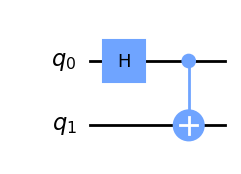

In [41]:
bell = QuantumCircuit(2)

bell.h(0) # apply an H gate to the circuit
bell.cx(0,1) # apply a CNOT gate to the circuit

bell.draw(output="mpl")

If we want to check what the matrix representation is of this quantum state we can convert the circuit directly to an operator:

In [42]:
bell_op = Operator(bell)

array_to_latex(bell_op)

<IPython.core.display.Latex object>

<div class="alert alert-block alert-success"> Ex 8 - the GHZ state is similar to the Bell State but applied to 3 qubits. Create a quantum circuit outputting the GHZ state </div>

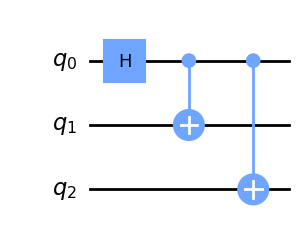

In [43]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)
##############################
# add gates to your circuit here



##############################

ghz.draw(output='mpl')

In [44]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex8

grade_lab1_ex8(ghz)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


## Measuring Quantum states

As explained in the lectures you can find the probability of measurement outcomes by taking the absolute value squared of the entries of a quantum state vector.

For example, when measuring the + state:  

$ |+\rangle = \frac{1}{\sqrt2}|0\rangle + \frac{1}{\sqrt2}|1\rangle $

The probability of measuring 0 or 1 is given by the following:

$ Pr(0) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$  
$ Pr(1) = |\frac{1}{\sqrt2}|^2 = \frac{1}{2}$

Let's create a $|+\rangle$ using the `Statevector` class:

In [45]:
plus_state = Statevector.from_label("+")

plus_state.draw('latex')

<IPython.core.display.Latex object>

In [46]:
plus_state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


Now we can get the probability of measuring 0 or 1:

In [47]:
plus_state.probabilities_dict()

{'0': 0.4999999999999999, '1': 0.4999999999999999}

The dictionary object above shows you all the possible measurement outcomes and what the probability is of getting them. The actual act of measuring forces the state to collapse into either the 0 or 1 state:

In [48]:
# run this cell multiple times to show collapsing into one state or the other
res = plus_state.measure()

res

('0',
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

We can implement the same $|+\rangle$ state with measurement using a quantum circuit:

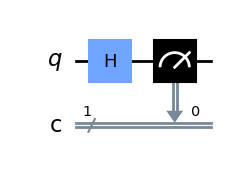

In [49]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0, 0)

qc.draw(output="mpl")

If we ran this circuit using a simulator we would get the same results as we did with the statevector class.

In the next example, let's use the `Statevector` class to find the measurement outcomes for a dependent, probabilistic state. We'll find the measurement probilities for the 2-qubit Bell State $|\phi^+\rangle$ :

In [50]:
sv_bell = Statevector([np.sqrt(1/2), 0, 0, np.sqrt(1/2)])

sv_bell.draw('latex')

<IPython.core.display.Latex object>

In [51]:
sv_bell.probabilities_dict()

{'00': 0.5000000000000001, '11': 0.5000000000000001}

<div class="alert alert-block alert-success"> Ex 9 - Using the Statevector class find the probabilities for the other 3 states in the Bell Basis: $|\psi^+\rangle$, $|\psi^-\rangle$, $|\phi^-\rangle$. Hint: check out lesson 2 to refresh your memory on the equations of the Bell states </div>

In [52]:
sv_psi_plus = Statevector([0,np.sqrt(1/2),np.sqrt(1/2),0]) # create a statevector for |𝜓+⟩ here
prob_psi_plus = sv_psi_plus.probabilities_dict() # find the measurement probabilities for |𝜓+⟩ here

sv_psi_minus =  Statevector([0,np.sqrt(1/2),np.sqrt(1/2),0])# create a statevector for |𝜓−⟩ here
prob_psi_minus = sv_psi_plus.probabilities_dict()# find the measurement probabilities for |𝜓−⟩ here

sv_phi_minus = Statevector([0,np.sqrt(1/2),np.sqrt(1/2),0])# create a statevector for |𝜙−⟩ here
prob_phi_minus = sv_psi_plus.probabilities_dict()# find the measurement probabilities for |𝜙−⟩ here

In [53]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex9

grade_lab1_ex9([prob_psi_plus, prob_psi_minus, prob_phi_minus])

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


# Final Challenge - generate a QFT circuit

[The Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) occurs in many different formats throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation. You'll learn more about this important implementation later on during the Summer School, but for this final challenge of Lab 1 we would like you to use Qiskit to create the following QFT circuit on 2 qubits:

![](resources/qft.png)

<div class="alert alert-block alert-success"> Ex 10 - create a 2 qubit QFT circuit using qiskit </div>

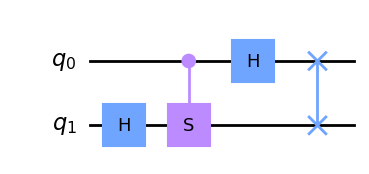

In [54]:

qft = QuantumCircuit(2)
##############################
# add gates to your circuit here

qft.h(1)
qft.cs(0,1)
qft.h(0)
qft.swap(0,1)

##############################

qft.draw(output='mpl')

In [55]:
from qc_grader.challenges.qgss_2023 import grade_lab1_ex10

grade_lab1_ex10(qft)

Submitting your answer. Please wait...
Failed: {'errors': [{'message': 'The challenge is not active', 'extensions': {'code': 'INVALID_QUERY'}}]}


To see the matrix that describes the action of this circuit, we can plug the circuit into the `Operator` function like this:

In [56]:
U = Operator(qft)

array_to_latex(U)

<IPython.core.display.Latex object>

Congratulations! You finished Lab 1 of the Qiskit Global Summer School 2023! 🎉 🎉 🎉